<a href="https://colab.research.google.com/github/Vishalkushwaha780/Deep-Learning-Project/blob/main/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.listdir("/content/")

['.config', 'drive', 'sample_data']

In [4]:
import zipfile

zip_path = "/content/drive/MyDrive/my_folder/archive.zip"
extract_path = "/content/"

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete! Files are in:", extract_path)

Extraction complete! Files are in: /content/


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [6]:
os.listdir()


['.config', 'drive', 'data', 'sample_data']

In [7]:
mask_data = os.listdir('/content/data/with_mask')
without_mask_data = os.listdir('/content/data/without_mask')

In [8]:
mask_data[0:5]

['with_mask_1613.jpg',
 'with_mask_384.jpg',
 'with_mask_2551.jpg',
 'with_mask_946.jpg',
 'with_mask_1262.jpg']

In [9]:
mask_data[-5:-1]

['with_mask_3015.jpg',
 'with_mask_915.jpg',
 'with_mask_3007.jpg',
 'with_mask_990.jpg']

In [10]:
print("Total images with mask",len(mask_data))

Total images with mask 3725


In [11]:
print("Total images with mask",len(without_mask_data))

Total images with mask 3828


In [12]:
mask_data_op = [1]*3725
without_mask_data_op = [0]*3828

In [13]:
print(mask_data_op[:5:1])
print(without_mask_data_op[:5:1])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
Target = mask_data_op + without_mask_data_op
len(Target)

7553

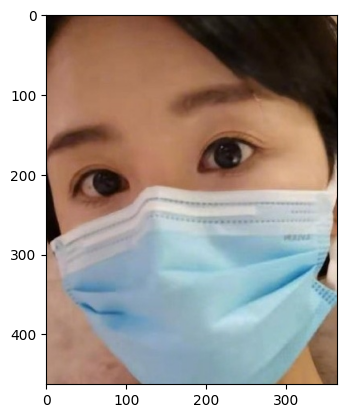

In [15]:
img = mpimg.imread('/content/data/with_mask/with_mask_111.jpg')
imgplot = plt.imshow(img)
plt.show()

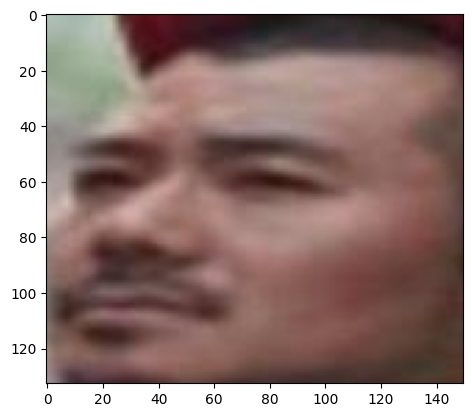

In [16]:
withoutmask_img = mpimg.imread('/content/data/without_mask/without_mask_12.jpg')
imgplot = plt.imshow(withoutmask_img)
plt.show()

In [17]:

#Converting mask images to np array
mask_path='/content/data/with_mask/'
data = []

In [18]:
for img_file in mask_data:
  image = Image.open(mask_path + img_file)
  image = image.resize((128,128))
  image=image.convert('RGB')
  data.append(np.array(image))
print(len(data))

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


3725


In [19]:
data[0].shape

(128, 128, 3)

In [20]:
#Converting without mask images to np array
without_mask_path='/content/data/without_mask/'

for img_file in without_mask_data:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image=image.convert('RGB')
  data.append(np.array(image))
print(len(data))

7553


In [21]:
print(len(data))
print(data[0].shape)

7553
(128, 128, 3)


In [22]:

X = np.array(data)
y = np.array(Target)


In [23]:
type(X)

numpy.ndarray

In [24]:
type(y)

numpy.ndarray

In [25]:
X.shape

(7553, 128, 128, 3)

In [26]:
y.shape

(7553,)

In [27]:
##building a model CNN

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
model = Sequential()

In [31]:
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [33]:

model.add(keras.layers.Flatten())

In [34]:
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

In [35]:

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

In [36]:
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [40]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255


In [41]:
x_train_scaled.shape,x_test_scaled.shape,y_train.shape,y_test.shape


((6042, 128, 128, 3), (1511, 128, 128, 3), (6042,), (1511,))

In [42]:
history= model.fit(x_train_scaled,y_train)

189/189 ━━━━━━━━━━━━━━━━━━━━ 130s 673ms/step - accuracy: 0.6248 - loss: 1.4334


In [43]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - accuracy: 0.8952 - loss: 0.2898


In [44]:
from tensorflow.keras.utils import plot_model


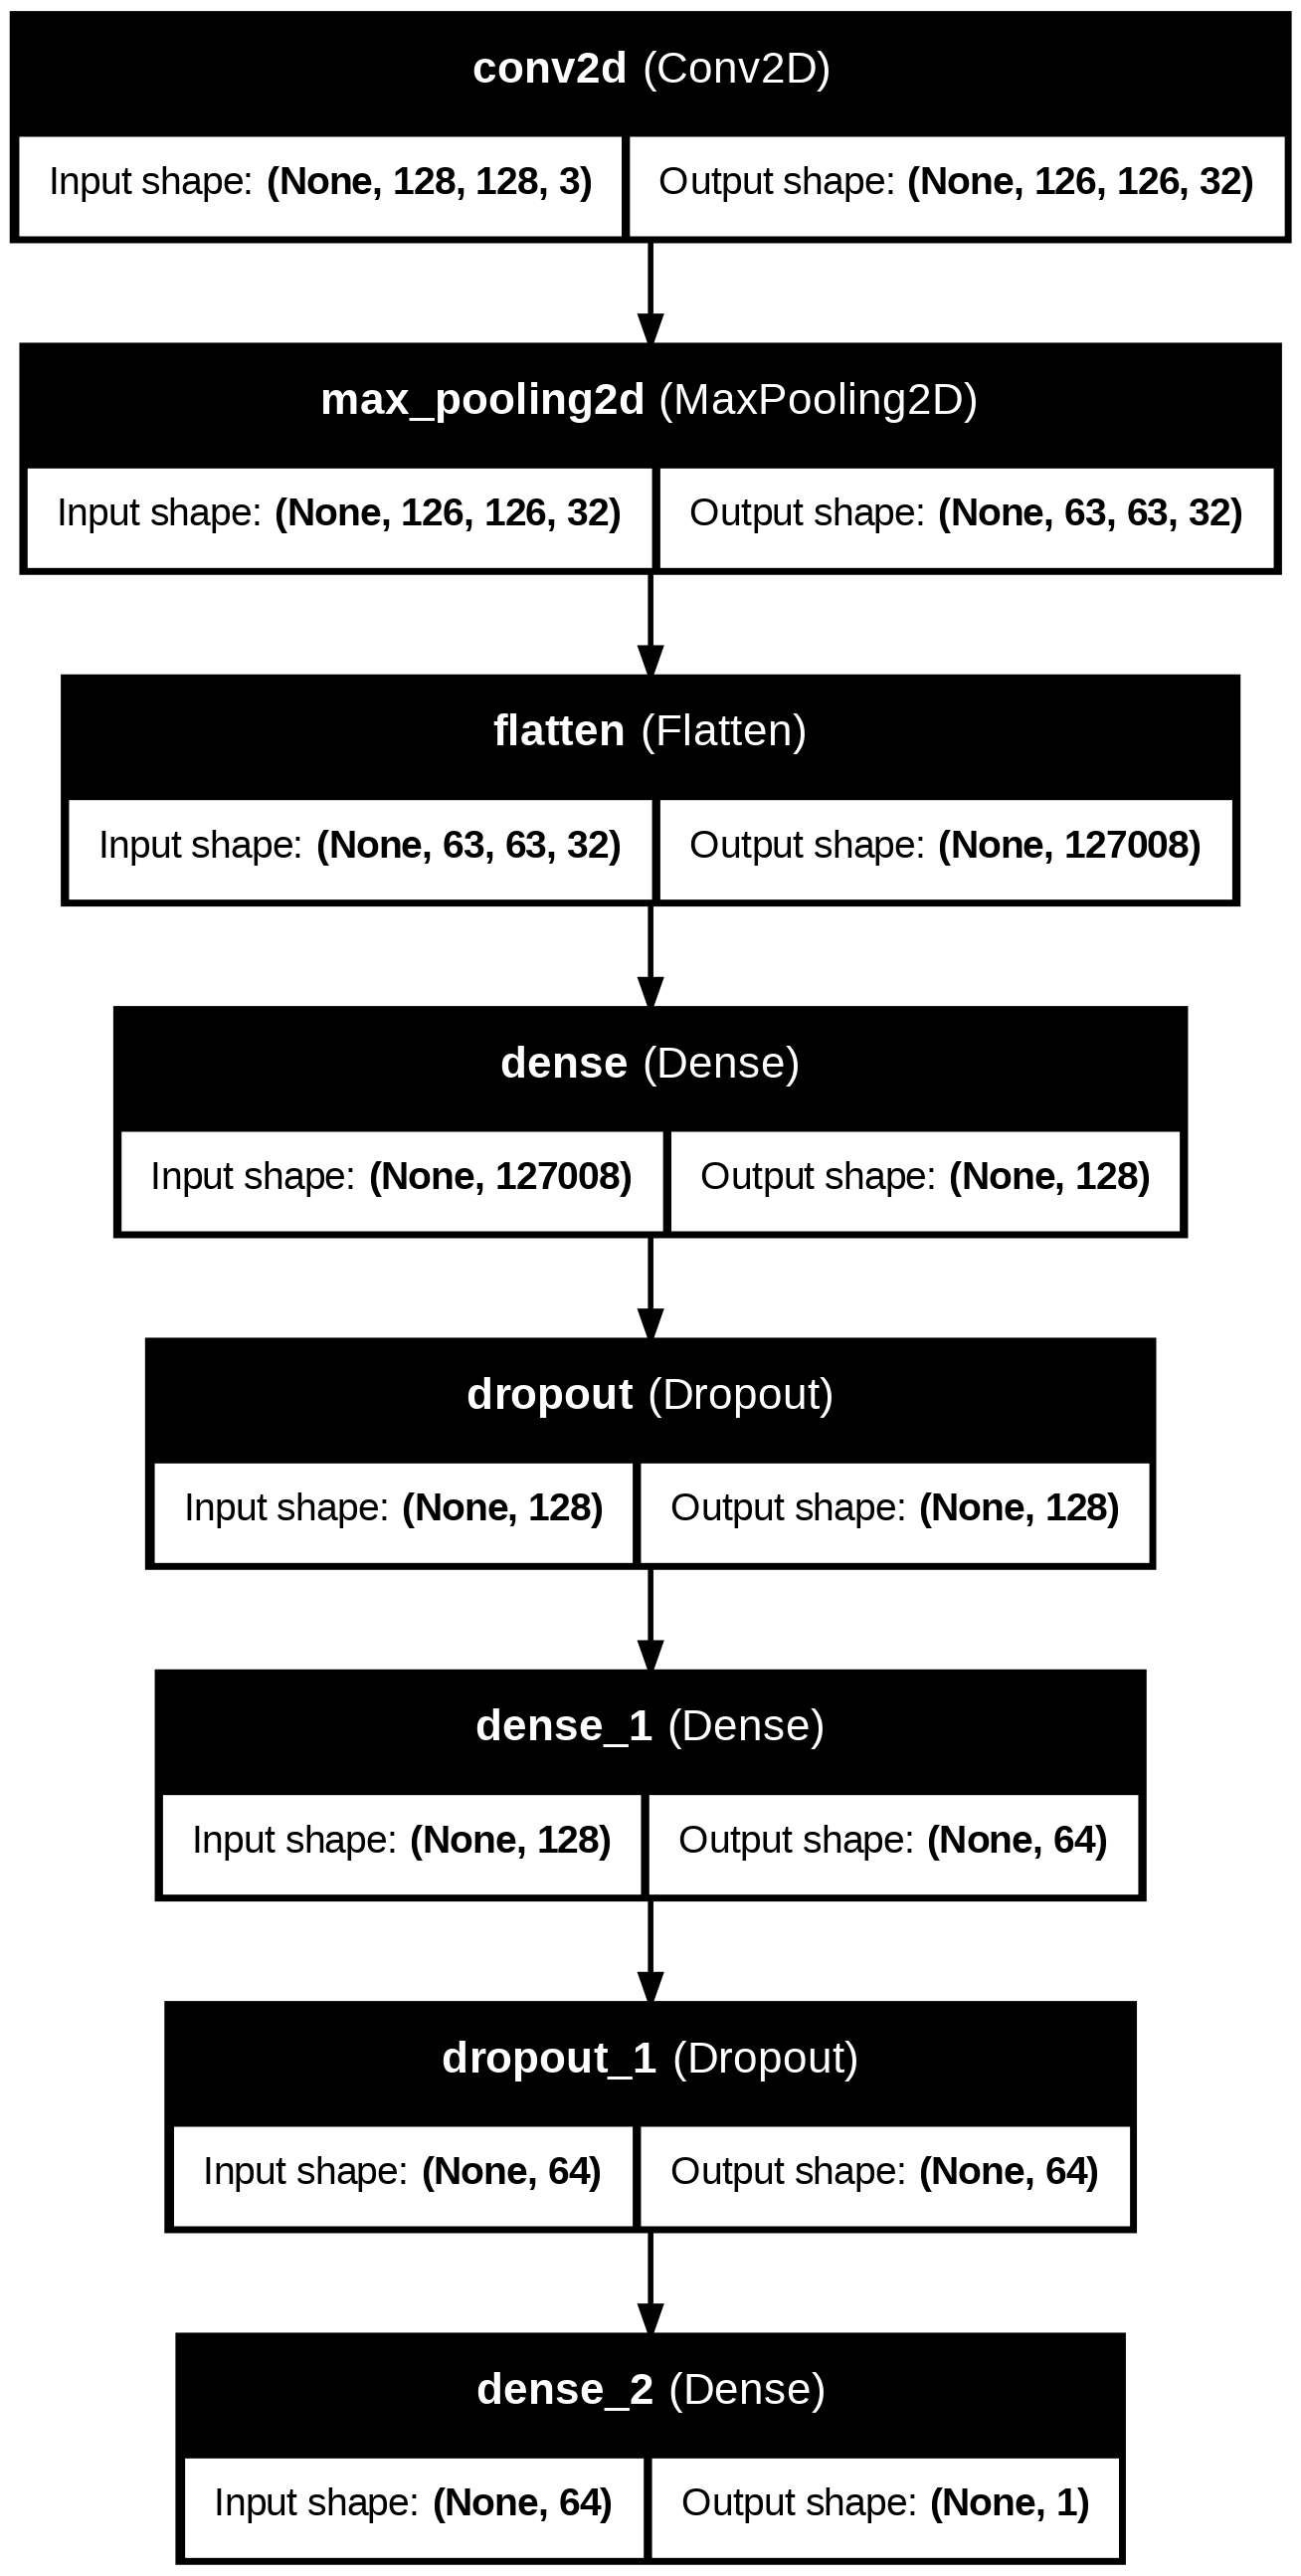

In [45]:
plot_model(model, to_file = 'model_plot.png', show_shapes=True, show_layer_names = True)

 Path of the image to be predicted:/content/yogi ji.png


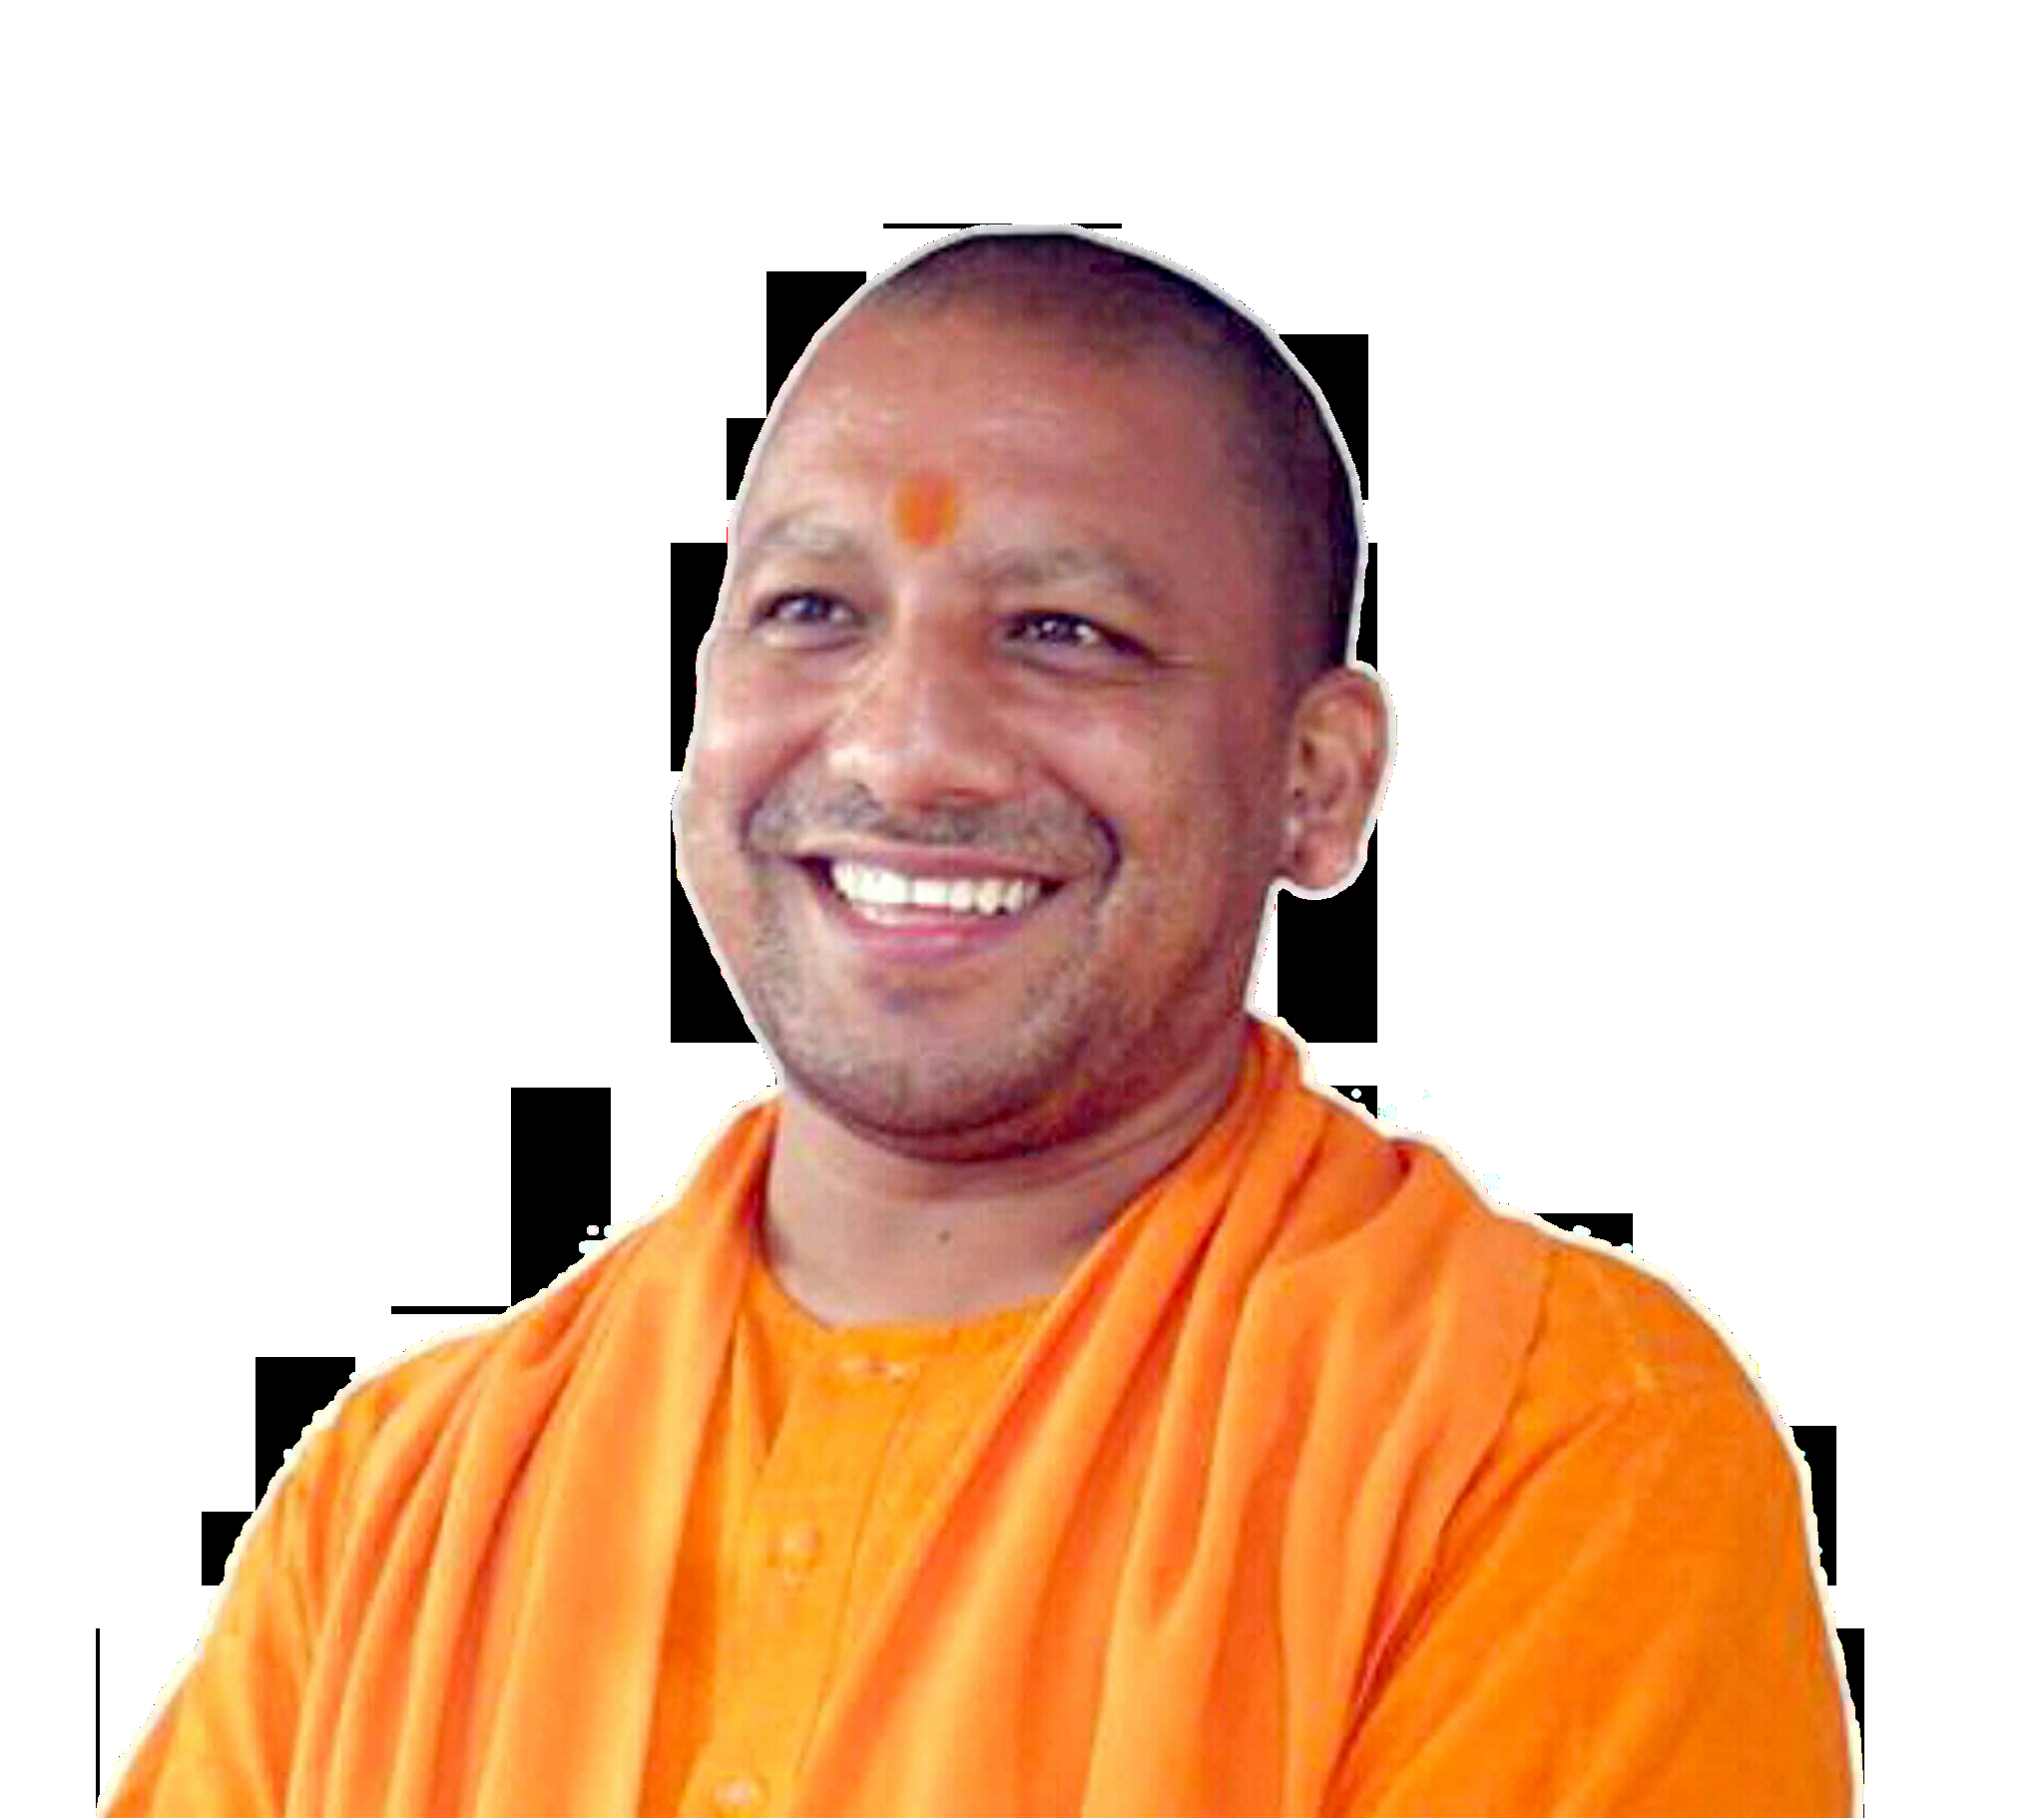

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[[0.99956787]]
0
The person in the image is not wearing a mask


In [48]:
input_image_path = input(' Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
# Saving the model

In [49]:
model.save("cnn_model.h5")


In [50]:
from tensorflow.keras.models import load_model

model = load_model("cnn_model.h5")  # Load the model


Enter the image path: /content/yogi ji.png


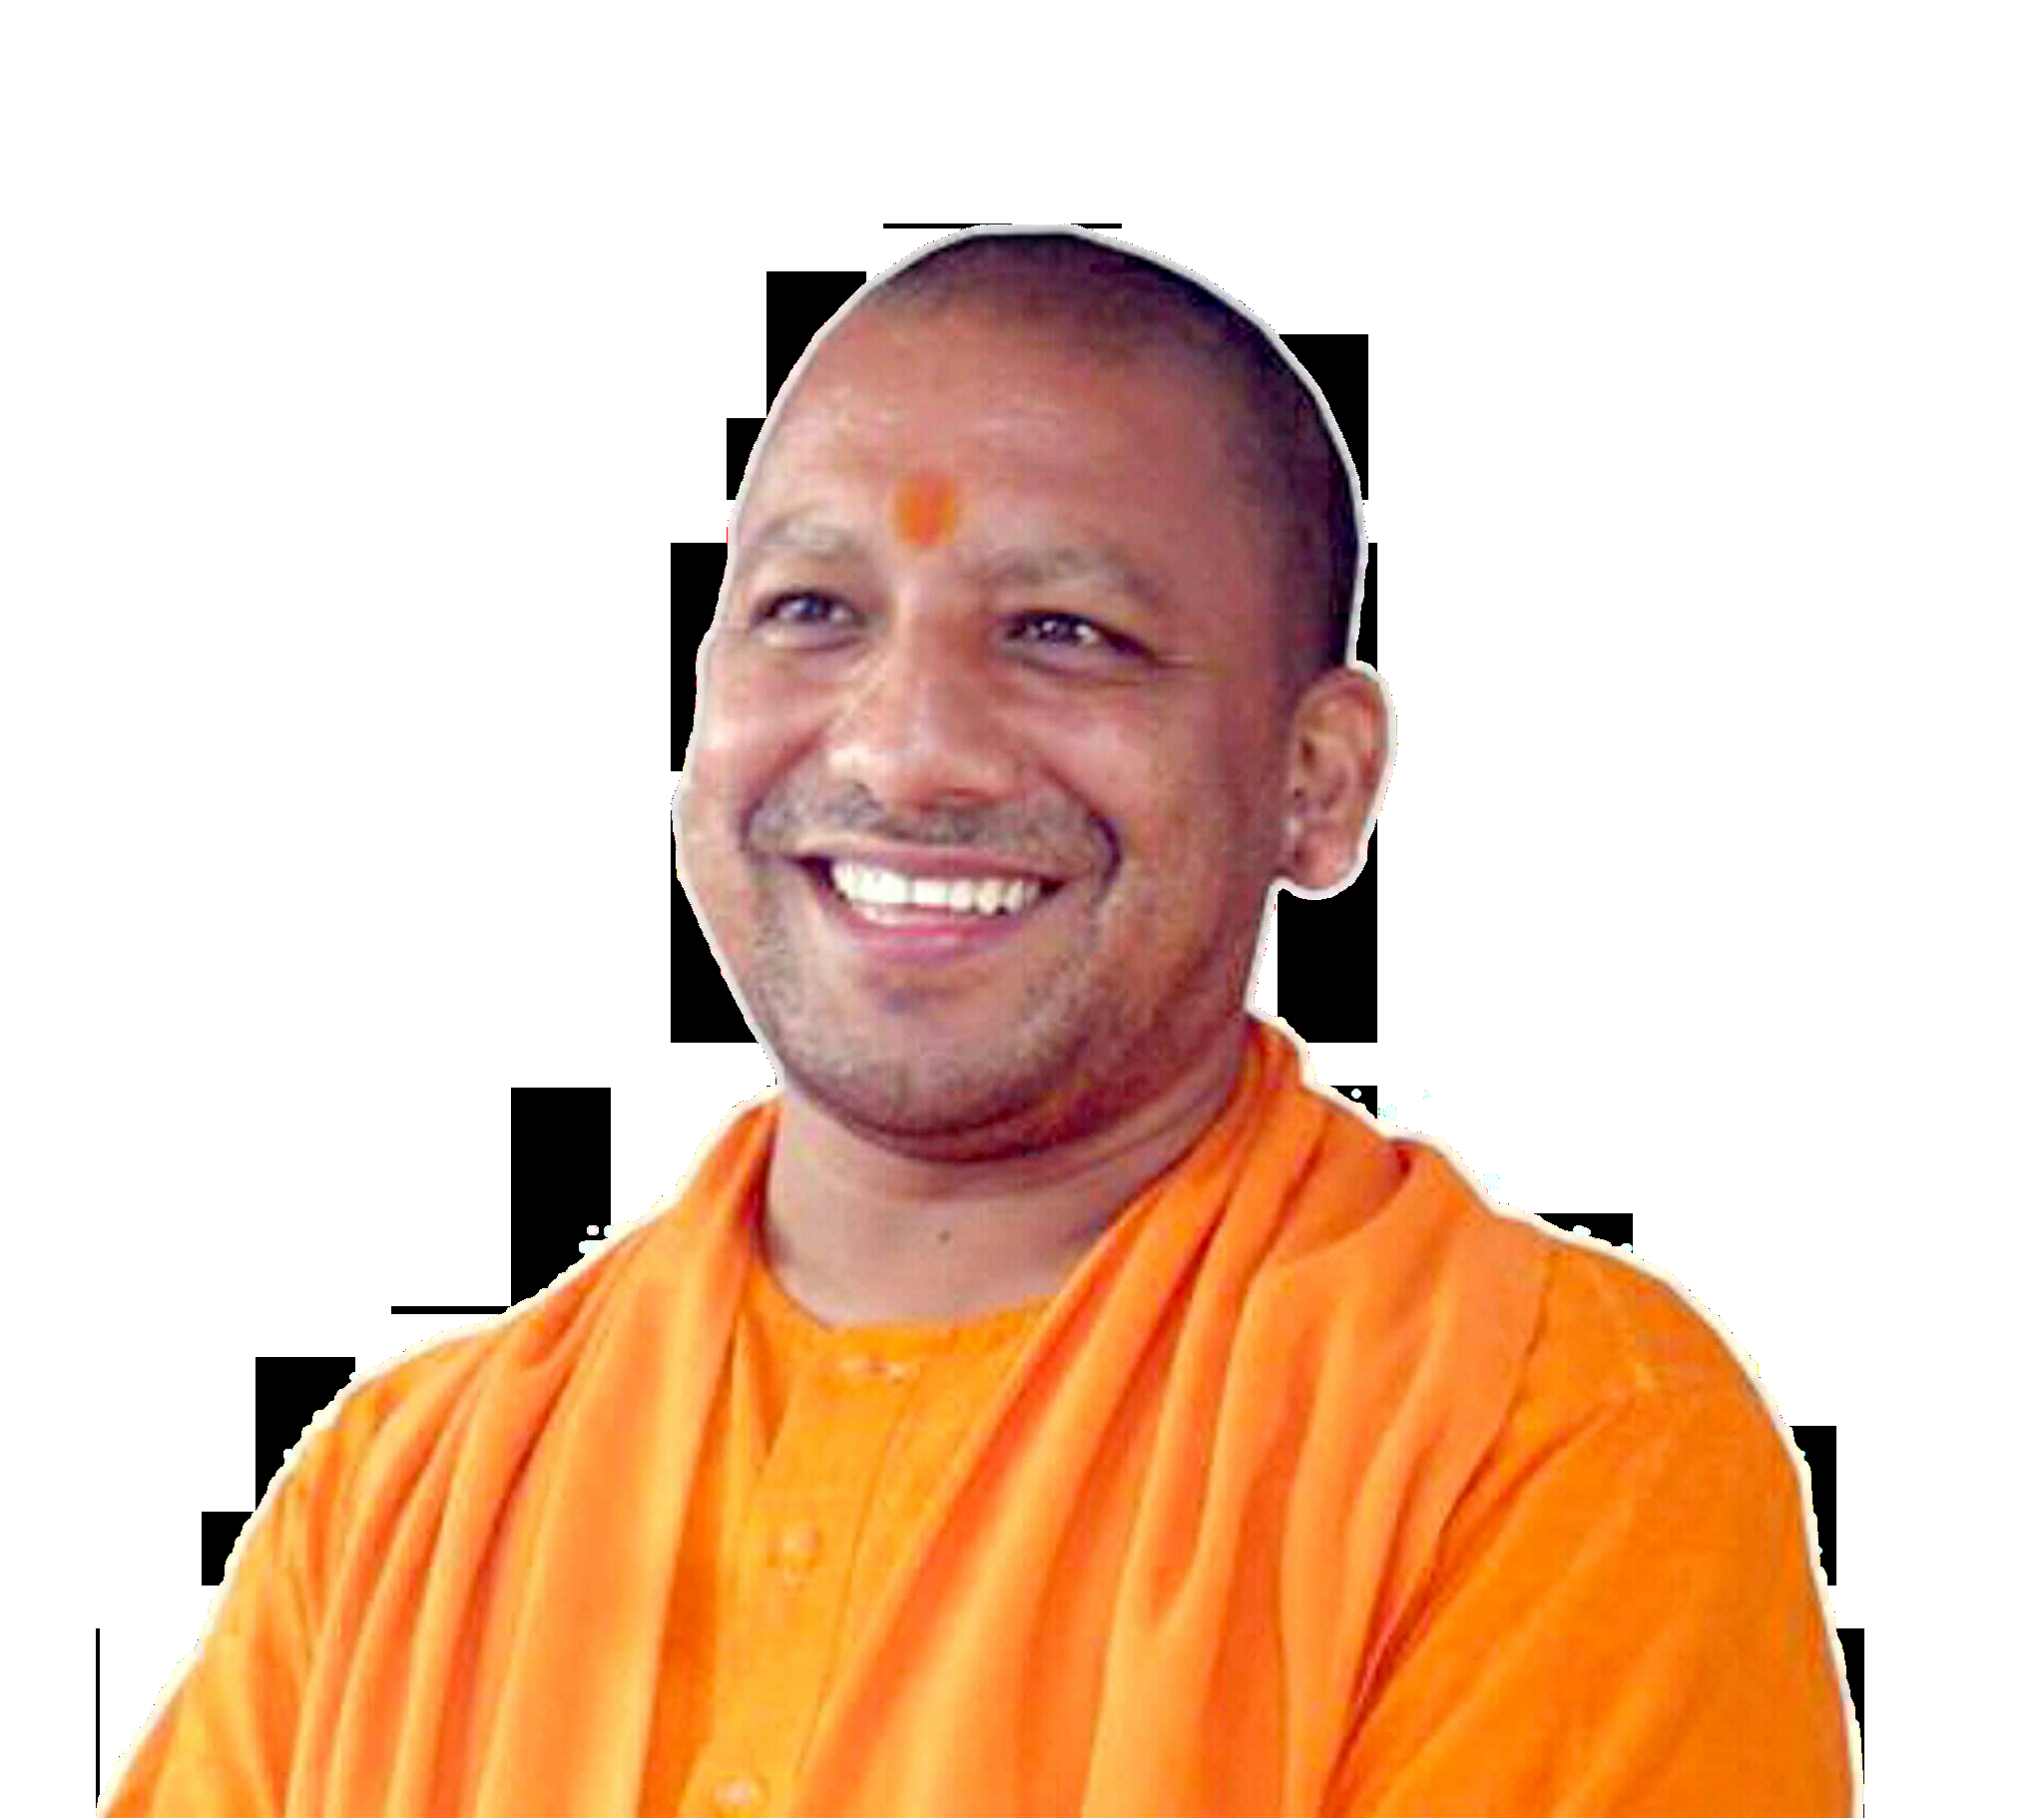

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Raw Prediction Output: [[0.99956787]]
The person in the image is NOT wearing a mask ❌


In [53]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

model = load_model("cnn_model.h5")

def predict_mask(image_path):
    """
    Predicts whether a person in the given image is wearing a mask or not.

    Args:
        image_path (str): Path to the image file.

    Returns:
        None (Prints the prediction result)
    """
    input_image = cv2.imread(image_path)


    if input_image is None:
        print("Error: Unable to load image. Check the path and try again.")
        return


    cv2_imshow(input_image)


    input_image_resized = cv2.resize(input_image, (128, 128))

    input_image_scaled = input_image_resized / 255.0

    # Reshape to match model input
    input_image_reshaped = np.expand_dims(input_image_scaled, axis=0)

    input_prediction = model.predict(input_image_reshaped)
    print("Raw Prediction Output:", input_prediction)

    input_pred_label = np.argmax(input_prediction)
    if input_pred_label == 1:
        print("The person in the image is wearing a mask 😷")
    else:
        print("The person in the image is NOT wearing a mask ❌")

# Example Usage
image_path = input("Enter the image path: ")
predict_mask(image_path)